## <center> KMeans-Clustering </center>
### Wine dataset 🍷
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/sample_data/wine.csv")


print(data)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [ ]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
data.duplicated().sum()

0

Il n y a pas de valeurs vide ni de doublon.

### Description statistique 

In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##La methode de Elbow

La méthode du Elbow est une heuristique utilisée pour déterminer le nombre de clusters dans un ensemble de données. La méthode consiste à tracer la variation expliquée en fonction du nombre de clusters et à choisir le Elbow de la courbe comme nombre de clusters à utiliser.

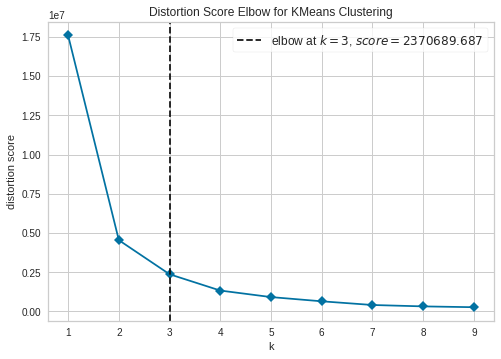

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10),timings=False)
visualizer.fit(data)
visualizer.show()

L'analyse en composante principale ou PCA (Principal component analysis) est une méthode de réduction de dimension, largement utilisée en statistique descriptive, pour visualiser sur un graphique à 2 ou 3 dimensions des données décrites sur plus de dimensions.

[Source](https://dridk.me/analyse-en-composante-principale.html#:~:text=L'analyse%20en%20composante%20principale%20ou%20PCA%20(Principal%20component%20analysis,d%C3%A9crites%20sur%20plus%20de%20dimensions.)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X = pca.fit_transform(data)

##Construction du modèle K-means

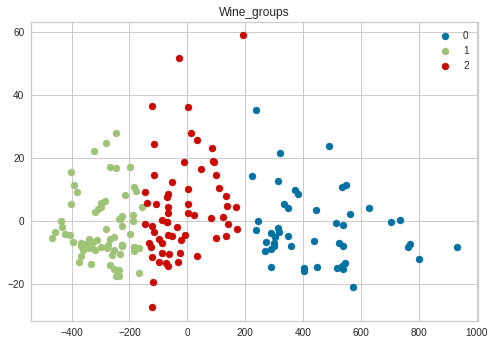

In [ ]:
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)
for i in unique_labels:
    plt.scatter(X[label==i,0],X[label==i,1],label=i,s=50)
    
plt.legend()
plt.title("Wine_groups")
plt.show()

In [ ]:
print('Prediction', kmeans.labels_)

Prediction [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]
